# Filtro Notch mediante Z transform

Se pretende demostrar lo útil que resulta la transformada Z para diseñar filtros e implementarlos.

Se dispone del siguiente filtro diseñado en el plano complejo:

$$ H[z] = {{1 -1.414 z^{-1} + z^{-2}} \over {1 -1.273 z^{-1} + 0.810 z^{-2}}} $$

Se convierte al dominio del tiempo o muestras:

$$ y[n] = x[n] - 1.414\ x[n-1] + x[n-2] + 1.273\ y[n-1] - 0.810\ y[n-2] $$

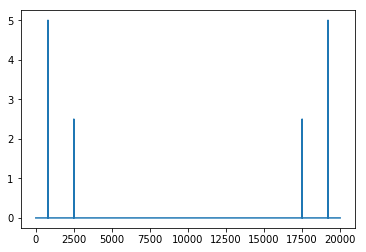

In [6]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division
import matplotlib.pyplot as plt

Fc = 400 # Frecuencia de señal
Fs = 10000
Fn = Fs/8

N = 20000 # Numero total de muestras por cada señal

t = np.arange(0, N/Fs, 1/Fs)

x = 10*np.sin(2*np.pi*Fc*t)
n = 5*np.sin(2*np.pi*Fn*t)

plt.plot(abs(fft(x+n))/N)


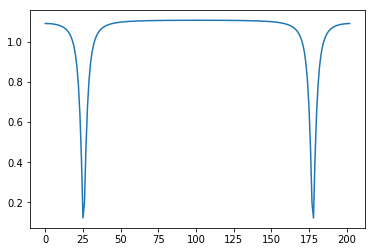

In [2]:
def notch_filter (signal):
    zeros = np.zeros(2)
    x = np.concatenate((zeros,signal), axis=0)
    y = np.zeros(len(signal)+2)
    for i in range (len(signal)):
        n = i+2 # Solo para facilitar la escritura
        y[n] = x[n] - 1.414* x[n-1] + x[n-2] + 1.273 * y[n-1] - 0.81 * y[n-2]
    return y

zeros = np.zeros(100)
ones = np.ones(1)
dirac = np.concatenate((zeros,ones,zeros),axis=0)
plt.plot(abs(fft(notch_filter(dirac))))

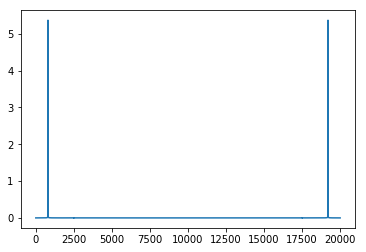

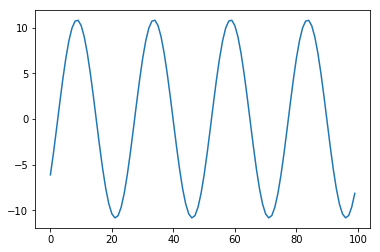

In [11]:
sig_fil = notch_filter(x+n)
plt.plot(abs(fft(sig_fil)/N))
plt.figure(2)
plt.plot(sig_fil[100:200])

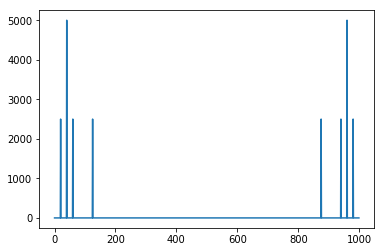

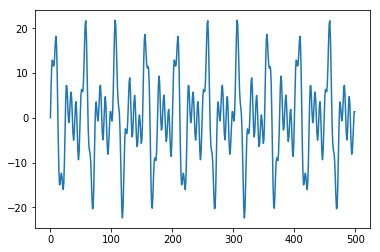

In [12]:
F = 200
mod = 1*np.sin(2*np.pi*F*t)
am = (mod +1 )* x +n
plt.plot(abs(fft(am[0:1000])))
plt.figure(2)
plt.plot(am[0:500])

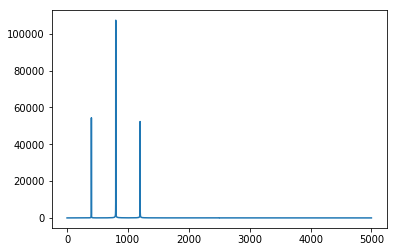

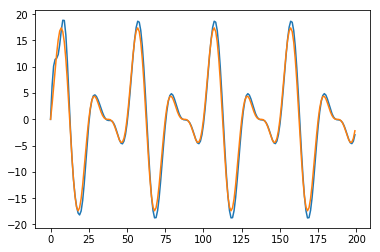

In [15]:
filt_am = notch_filter(am)
plt.plot(abs(fft(filt_am))[0:5000])
plt.figure(2)
plt.plot(filt_am[2:202])
plt.plot((am-n)[0:200])